In [62]:
import os
os.chdir("/Users/Arunabh/Downloads/datasets-for-isrl/")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler


In [16]:
df = pd.read_csv("Credit.csv")
#Dropping Unnamed:0
df = df.drop(["Unnamed: 0"],1)
X = df.drop(["Balance"],1)
y = df["Balance"]

In [20]:
scaler  = MinMaxScaler()

In [25]:
X = pd.get_dummies(X)
cols = list(X)
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = cols
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
drop = ['Gender_ Male','Student_No','Married_No', 'Ethnicity_African American']

In [37]:
X= X.drop(drop,1)

In [40]:
X.dtypes

Income                 float64
Limit                  float64
Rating                 float64
Cards                  float64
Age                    float64
Education              float64
Gender_Female          float64
Student_Yes            float64
Married_Yes            float64
Ethnicity_Asian        float64
Ethnicity_Caucasian    float64
dtype: object

In [44]:
categorical = list(X)[-5:]

In [45]:
categorical

['Gender_Female',
 'Student_Yes',
 'Married_Yes',
 'Ethnicity_Asian',
 'Ethnicity_Caucasian']

In [47]:
for x in categorical:
    X[x] = X[x].astype("category")

In [48]:
X.dtypes

Income                  float64
Limit                   float64
Rating                  float64
Cards                   float64
Age                     float64
Education               float64
Gender_Female          category
Student_Yes            category
Married_Yes            category
Ethnicity_Asian        category
Ethnicity_Caucasian    category
dtype: object

In [51]:
y = pd.DataFrame(y)

In [53]:
y.columns = ["Balance"]

In [56]:
df = pd.concat([X,y],1)

In [57]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Balance
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.0,0.0,1.0,0.0,1.0,333
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,1.0,1.0,1.0,1.0,0.0,903
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.0,0.0,0.0,1.0,0.0,580
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,1.0,0.0,0.0,1.0,0.0,964
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.0,0.0,1.0,0.0,1.0,331


In [60]:
numeric = df.select_dtypes(include = np.number)
non_numeric = df.select_dtypes(exclude = np.number)

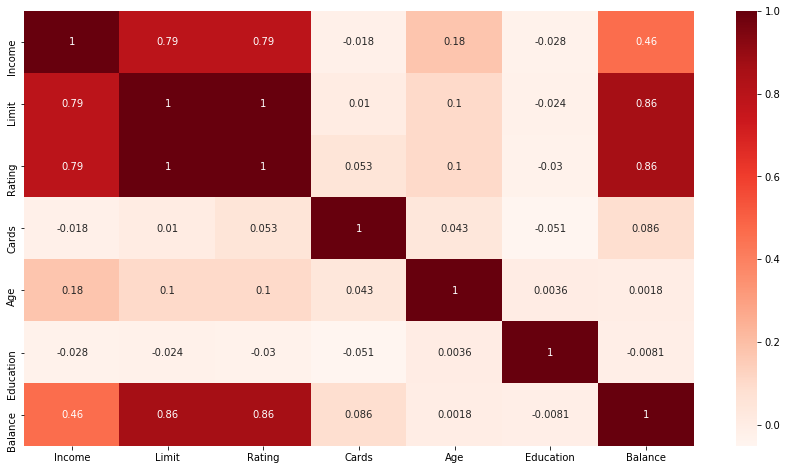

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric.corr(), annot=True, cmap=plt.cm.Reds)

In [67]:
df.dtypes

Income                  float64
Limit                   float64
Rating                  float64
Cards                   float64
Age                     float64
Education               float64
Gender_Female          category
Student_Yes            category
Married_Yes            category
Ethnicity_Asian        category
Ethnicity_Caucasian    category
Balance                   int64
dtype: object

In [72]:
cols = list(df)[-6:-1]

In [73]:
for x in cols:
    df[x] = df[x].astype("int")

In [74]:
df.dtypes

Income                 float64
Limit                  float64
Rating                 float64
Cards                  float64
Age                    float64
Education              float64
Gender_Female            int64
Student_Yes              int64
Married_Yes              int64
Ethnicity_Asian          int64
Ethnicity_Caucasian      int64
Balance                  int64
dtype: object

In [ ]:
# sm.OLS(formula='Balance~ Literacy + Wealth + Region', data=df)

In [78]:
sm.OLS(formula = "Balance~Limit+Gender_Female+Student_Yes+Ethnicity_Asian+Ethnicity_Caucasian", data = df)

TypeError: __init__() missing 1 required positional argument: 'endog'

In [81]:
import statsmodels.formula.api as smf

In [87]:
results = smf.ols('Balance~Limit+Gender_Female+Student_Yes+Ethnicity_Asian+Ethnicity_Caucasian', data=df).fit()

In [88]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     341.8
Date:                Sat, 09 Feb 2019   Prob (F-statistic):          7.85e-141
Time:                        12:09:48   Log-Likelihood:                -2684.4
No. Observations:                 400   AIC:                             5381.
Df Residuals:                     394   BIC:                             5405.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -202.1246     28.616     -7.063      0.000    -258.384    -145.865
Limit                2247.0097     56.769     39.581      0.000    2135.401    2358.618
Gender_Female          -1.2961     20.075     -0.065      0.949     -40.763      38.171
Student_Yes           404.7709     33.480     12.090      0.000     338.949     470.593
Ethnicity_Asian        17.7660     28.299      0.628      0.530     -37.870      73.402
Ethnicity_Caucasian    20.1659     24.644      0.818      0.414     -28.285      68.616
==============================================================================
Omnibus:                        7.738   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.630
Skew:                          -0.330   Prob(JB):                       0.0220
Kurtosis:                       3.148   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
X = df.drop(["Balance"],1)
y = df["Balance"]

In [ ]:
list()

In [92]:
features = 
model = sm.OLS(y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1259.
Date:                Sat, 09 Feb 2019   Prob (F-statistic):          2.81e-296
Time:                        12:13:19   Log-Likelihood:                -2464.4
No. Observations:                 400   AIC:                             4951.
Df Residuals:                     389   BIC:                             4995.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income              -1303.8348     48.110    -27.101      0.000   -1398.423   -1209.247
Limit                1716.6646    498.253      3.445      0.001     737.058    2696.271
Rating               1623.3748    510.270      3.181      0.002     620.143    2626.606
Cards                   6.2091     38.755      0.160      0.873     -69.986      82.404
Age                  -154.1725     23.793     -6.480      0.000    -200.952    -107.393
Education            -180.5368     23.426     -7.707      0.000    -226.594    -134.480
Gender_Female         -35.4657     11.424     -3.105      0.002     -57.926     -13.006
Student_Yes           410.7153     19.629     20.924      0.000     372.122     449.308
Married_Yes           -37.8319     11.869     -3.187      0.002     -61.168     -14.496
Ethnicity_Asian       -33.4019     15.906     -2.100      0.036     -64.675      -2.129
Ethnicity_Caucasian   -43.6597     13.416     -3.254      0.001     -70.036     -17.284
==============================================================================
Omnibus:                        8.913   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.683
Skew:                           0.206   Prob(JB):                       0.0354
Kurtosis:                       2.520   Cond. No.                         169.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""